In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tqqq = pd.read_csv('./data/stock/tqqq/TQQQ.csv')
qqq = pd.read_csv('./data/stock/qqq/QQQ.csv')

time_window = 30
stock = tqqq.iloc[-365*8:]

In [3]:
stock = stock.set_index('Date')
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900
2021-03-25,83.820000,86.180000,81.650002,84.900002,84.900002,59968600
2021-03-26,84.720001,88.970001,83.529999,88.650002,88.650002,53680500
2021-03-29,88.239998,89.540001,85.720001,88.599998,88.599998,47647300
2021-03-30,86.950000,87.790000,84.960000,87.340000,87.340000,36959300


In [4]:
feature = stock.columns
predict_column_name = 'Close'
predict_date_delta = 1 # predict next day
stock = stock[feature]
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400
...,...,...,...,...,...,...
2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900
2021-03-25,83.820000,86.180000,81.650002,84.900002,84.900002,59968600
2021-03-26,84.720001,88.970001,83.529999,88.650002,88.650002,53680500


In [5]:
train_data = stock.iloc[:int(len(stock)/4 * 3)]

In [6]:
test_data = stock.iloc[int(len(stock) /4 * 3):]

In [7]:
train_data.shape

(2101, 6)

In [8]:
test_data.shape

(701, 6)

In [9]:
from sklearn import preprocessing

In [10]:
sc = preprocessing.StandardScaler()
train_data_scaled = sc.fit_transform(train_data.values)

In [11]:
train_data_scaled

array([[-0.94344307, -0.93709915, -0.94179554, -0.93613533, -0.93604594,
        -1.68449618],
       [-0.93947873, -0.93620766, -0.93809211, -0.93563064, -0.93554151,
        -1.55677993],
       [-0.9327083 , -0.93224701, -0.9325144 , -0.93083648, -0.93074966,
        -1.53152261],
       ...,
       [ 3.3449121 ,  3.35554094,  3.37660228,  3.32210797,  3.32204742,
        -0.87367076],
       [ 3.38624751,  3.40675202,  3.45423775,  3.45533424,  3.45526776,
        -0.64773492],
       [ 3.40477696,  3.36676529,  3.42448958,  3.41045076,  3.41038596,
        -0.80612928]])

In [12]:
x_train = []
y_train = []

for i in range(time_window, len(train_data_scaled) + 1 - predict_date_delta):
    x_train.append(train_data_scaled[i-time_window:i])
    y_train.append(train_data_scaled[i + predict_date_delta - 1])

x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape

(2071, 30, 6)

In [14]:
y_train.shape

(2071, 6)

In [15]:
x_train

array([[[-0.94344307, -0.93709915, -0.94179554, -0.93613533,
         -0.93604594, -1.68449618],
        [-0.93947873, -0.93620766, -0.93809211, -0.93563064,
         -0.93554151, -1.55677993],
        [-0.9327083 , -0.93224701, -0.9325144 , -0.93083648,
         -0.93074966, -1.53152261],
        ...,
        [-0.89573819, -0.89540253, -0.89543497, -0.89347795,
         -0.89340915, -1.08356264],
        [-0.8946247 , -0.8965571 , -0.89398384, -0.89583783,
         -0.89576795, -0.6627662 ],
        [-0.89181847, -0.89242106, -0.89410472, -0.89686204,
         -0.89679166, -0.60462672]],

       [[-0.93947873, -0.93620766, -0.93809211, -0.93563064,
         -0.93554151, -1.55677993],
        [-0.9327083 , -0.93224701, -0.9325144 , -0.93083648,
         -0.93074966, -1.53152261],
        [-0.92910045, -0.9303616 , -0.92881097, -0.92865471,
         -0.9285689 , -1.29419914],
        ...,
        [-0.8946247 , -0.8965571 , -0.89398384, -0.89583783,
         -0.89576795, -0.6627662 ],
  

In [16]:
y_train

array([[-0.89452079, -0.89516864, -0.89572215, -0.89601594, -0.895946  ,
        -0.72424156],
       [-0.89352604, -0.89437943, -0.89206414, -0.89377475, -0.89370584,
        -1.29801157],
       [-0.89238276, -0.89291788, -0.89251762, -0.89203825, -0.89197011,
        -1.27513701],
       ...,
       [ 3.3449121 ,  3.35554094,  3.37660228,  3.32210797,  3.32204742,
        -0.87367076],
       [ 3.38624751,  3.40675202,  3.45423775,  3.45533424,  3.45526776,
        -0.64773492],
       [ 3.40477696,  3.36676529,  3.42448958,  3.41045076,  3.41038596,
        -0.80612928]])

In [17]:
model = tf.keras.models.Sequential()

# first LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True, input_shape=(time_window, len(feature))))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 20, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 40, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(len(feature)))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            4440      
_________________________________________________________________
dropout (Dropout)            (None, 30, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            16200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                3

In [19]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [20]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
65/65 [==============================] - 6s 32ms/step - loss: 0.5476
Epoch 2/100
65/65 [==============================] - 2s 29ms/step - loss: 0.2849
Epoch 3/100
65/65 [==============================] - 2s 29ms/step - loss: 0.2516
Epoch 4/100
65/65 [==============================] - 2s 31ms/step - loss: 0.2400
Epoch 5/100
65/65 [==============================] - 2s 32ms/step - loss: 0.2210
Epoch 6/100
65/65 [==============================] - 2s 30ms/step - loss: 0.2102
Epoch 7/100
65/65 [==============================] - 2s 31ms/step - loss: 0.2046
Epoch 8/100
65/65 [==============================] - 2s 32ms/step - loss: 0.2086
Epoch 9/100
65/65 [==============================] - 3s 48ms/step - loss: 0.1975
Epoch 10/100
65/65 [==============================] - 3s 48ms/step - loss: 0.1862
Epoch 11/100
65/65 [==============================] - 2s 38ms/step - loss: 0.1927
Epoch 12/100
65/65 [==============================] - 3s 44ms/step - loss: 0.1892
Epoch 13/100
65/65 [=====

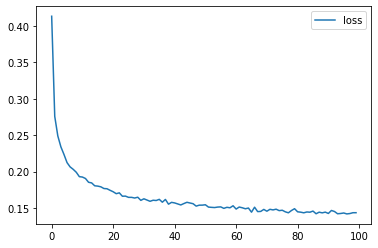

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
# Prediction based on last time frame real stock value

dataset_total = pd.concat((train_data, test_data), axis = 0)

inputs = dataset_total[len(dataset_total) - len(test_data) - time_window:].values

inputs = sc.fit_transform(inputs)

x_test = []
for i in range(time_window, len(test_data) + time_window):
    x_test.append(inputs[i-time_window:i])

x_test = np.array(x_test)
x_test.shape

(701, 30, 6)

In [23]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.columns = feature

In [24]:
predicted_stock

,Open,High,Low,Close,Adj Close,Volume
0,28.486795,29.199514,27.866495,28.583328,28.608332,19968834.0
1,28.562754,29.276115,27.940317,28.658541,28.682995,20075788.0
2,28.691576,29.406013,28.065399,28.785908,28.809542,20344870.0
3,28.827576,29.543282,28.197456,28.920498,28.943312,20589866.0
4,28.989183,29.706381,28.354357,29.080402,29.102270,20900342.0
...,...,...,...,...,...,...
696,88.509125,89.899681,85.930031,88.174232,88.097763,33816188.0
697,88.097435,89.474113,85.540382,87.764915,87.687439,33486608.0
698,87.101349,88.482224,84.559746,86.774117,86.695282,34013748.0
699,86.534538,87.918793,84.000359,86.209473,86.128998,34424888.0


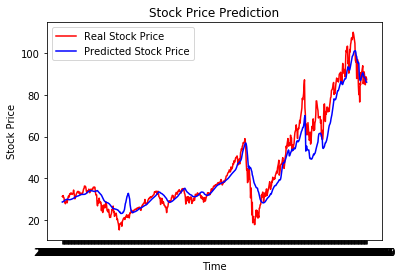

In [25]:
real_stock_price = test_data.iloc[predict_date_delta-1:, test_data.columns.get_loc(predict_column_name)]
predicted_stock_price = predicted_stock.loc[:, predict_column_name]

# plot
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
# Predict next day
inputs = stock[-time_window:].values

inputs = sc.fit_transform(inputs)

x_test = np.array(inputs)
x_test = np.reshape(x_test, (-1, time_window, len(feature)))
x_test.shape

(1, 30, 6)

In [27]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.columns = feature

In [28]:
predicted_stock

,Open,High,Low,Close,Adj Close,Volume
0,87.850029,90.328407,84.190392,87.107147,87.114014,48070460.0
